<a href="https://colab.research.google.com/github/veeragowri/task-8/blob/main/task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



In [10]:
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')
print(df.head())

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_


df['Cluster'] = labels

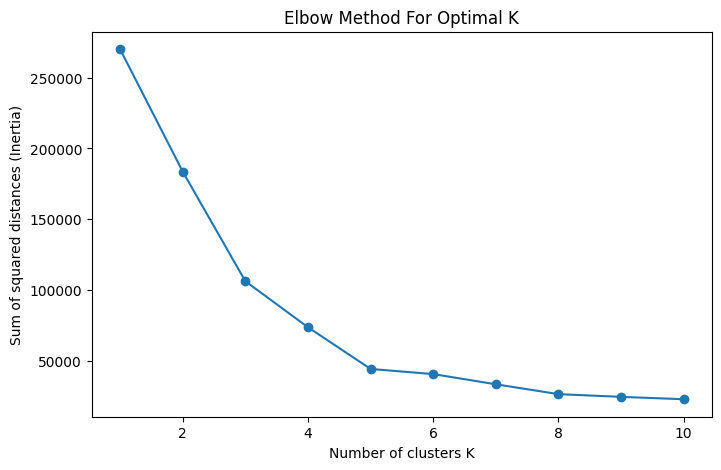

In [12]:
sse = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Optimal K')
plt.show()

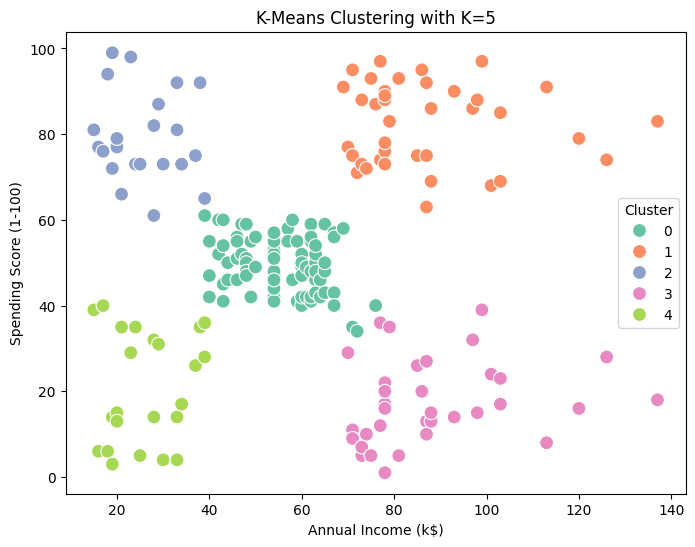

In [13]:
optimal_k = 5
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)
clusters_opt = kmeans_opt.fit_predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'],
                hue=clusters_opt, palette='Set2', s=100)
plt.title(f'K-Means Clustering with K={optimal_k}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [14]:
score = silhouette_score(X, clusters_opt)
print(f'Silhouette Score for K={optimal_k}: {score:.4f}')

Silhouette Score for K=5: 0.5539
